In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Apr  3 03:59:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!unzip '/content/drive/MyDrive/fac_data.zip' -d '/content/drive/MyDrive/fac_data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90539392.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90542712.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90549254.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90554374.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90567888.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90609638.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90614966.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90627242.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90628919.jpg  
  inflating: /content/drive/MyDrive/fac_data/archive (2)/train/happy/Training_90682277.jpg  
  inflating: /conte

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
train_data_dir='/content/drive/MyDrive/fac_data/archive (2)/train'
test_data_dir='/content/drive/MyDrive/fac_data/archive (2)/test'



In [ ]:
IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=30,shear_range=0.3,zoom_range=0.3,horizontal_flip=True,fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,color_mode='grayscale',target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='categorical',shuffle=True)
validation_generator=validation_datagen.flow_from_directory(test_data_dir,color_mode='grayscale',target_size=(IMG_HEIGHT, IMG_WIDTH),batch_size=batch_size,class_mode='categorical',shuffle=True)

In [ ]:
class_labels=['angry','fear','happy','neutral','sad','surprise']

In [ ]:
img, label=train_generator.__next__()

In [ ]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))


model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_path='/content/drive/MyDrive/fac_data/archive (2)/train'
test_path='/content/drive/MyDrive/fac_data/archive (2)/test'

num_train_imgs=0

for root,dirs,files in os.walk(train_path):
  num_train_imgs += len(files)

num_test_imgs=0

for root,dirs,files in os.walk(test_path):
  num_test_imgs += len(files)


epochs=50

hstory=model.fit(train_generator,steps_per_epoch=num_train_imgs//batch_size,epochs=epochs,validation_data=validation_generator,validation_steps=num_test_imgs//batch_size)

model.save('/content/drive/MyDrive/fac_data/archive (2)/Lokesh_model_face.h5')







Epoch 1/50
353/353 [==============================] - 59s 137ms/step - loss: 1.8318 - accuracy: 0.2592 - val_loss: 1.8419 - val_accuracy: 0.1500
Epoch 2/50
353/353 [==============================] - 47s 133ms/step - loss: 1.7754 - accuracy: 0.2799 - val_loss: 1.7747 - val_accuracy: 0.2083
Epoch 3/50
353/353 [==============================] - 46s 131ms/step - loss: 1.7450 - accuracy: 0.2977 - val_loss: 1.7842 - val_accuracy: 0.2444
Epoch 4/50
353/353 [==============================] - 47s 132ms/step - loss: 1.7065 - accuracy: 0.3186 - val_loss: 1.6838 - val_accuracy: 0.3003
Epoch 5/50
353/353 [==============================] - 46s 131ms/step - loss: 1.6662 - accuracy: 0.3386 - val_loss: 1.5821 - val_accuracy: 0.3695
Epoch 6/50
353/353 [==============================] - 47s 134ms/step - loss: 1.6207 - accuracy: 0.3646 - val_loss: 1.4948 - val_accuracy: 0.4103
Epoch 7/50
353/353 [==============================] - 46s 131ms/step - loss: 1.5896 - accuracy: 0.3768 - val_loss: 1.5120 - val_ac

In [ ]:
hstory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

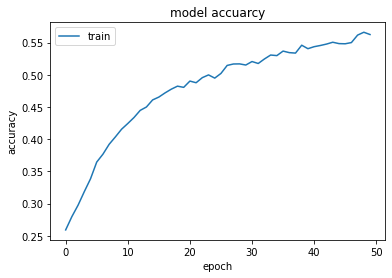

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hstory.history['accuracy'])
plt.title('model accuarcy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()